Missing Data:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  0.539668  0.784314  0.043512   0.020469    0.008941  0.001499  0.567481   
1  0.538027  0.392157  0.038224   0.018929    0.067210  0.001141  0.565356   
2  0.466028  1.000000  0.052756   0.021940    0.013818  0.001698  0.564293   
3  0.354699  1.000000  0.035241   0.021929    0.015555  0.001493  0.564293   
4  0.230776  1.000000  0.038534   0.022166    0.015752  0.001198  0.564293   

   Longitude  CombinedFeature  
0   0.211155         0.583181  
1   0.212151         0.576251  
2   0.210159         0.518785  
3   0.209163         0.389940  
4   0.209163         0.269310  


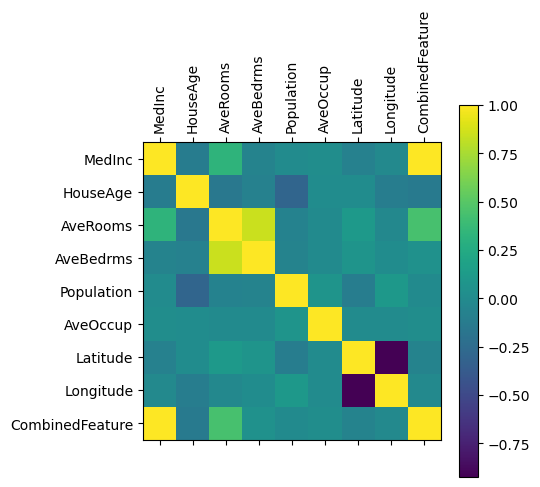

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['Target'] = data['target']

# Check for missing data
missing_data = df.isnull().sum()
print("Missing Data:\n", missing_data)

# Normalize continuous variables using MinMaxScaler
scaler = MinMaxScaler()
continuous_cols = df.columns.difference(['Target'])  # Exclude the target column
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

# Create the 'HouseAge_Category' column using pd.cut()
df['HouseAge_Category'] = pd.cut(df['Target'], bins=[0, 10, 20, np.inf], labels=[1, 2, 3])

# Combine 'MedInc' and 'AveRooms' to create a new feature
df['CombinedFeature'] = df['MedInc'] + df['AveRooms']

# Apply one-hot encoding to the new 'HouseAge_Category' column
encoder = OneHotEncoder(sparse_output=False, drop='first')
one_hot_encoded = encoder.fit_transform(df[['HouseAge_Category']])
columns = encoder.get_feature_names_out(['HouseAge_Category'])
columns = [col.replace('x0', 'HouseAge') for col in columns]

# Add the one-hot encoded columns and the new feature to the DataFrame
df_encoded = pd.concat([df, pd.DataFrame(one_hot_encoded, columns=columns)], axis=1)

# Drop the original 'HouseAge_Category' column and the target column if needed
df_encoded = df_encoded.drop(['HouseAge_Category', 'Target'], axis=1)

# Display the updated DataFrame
print(df_encoded.head())

# Create a correlation matrix
correlation_matrix = df_encoded.corr()

# Visualize the correlation matrix using plt.matshow()
plt.matshow(correlation_matrix, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()


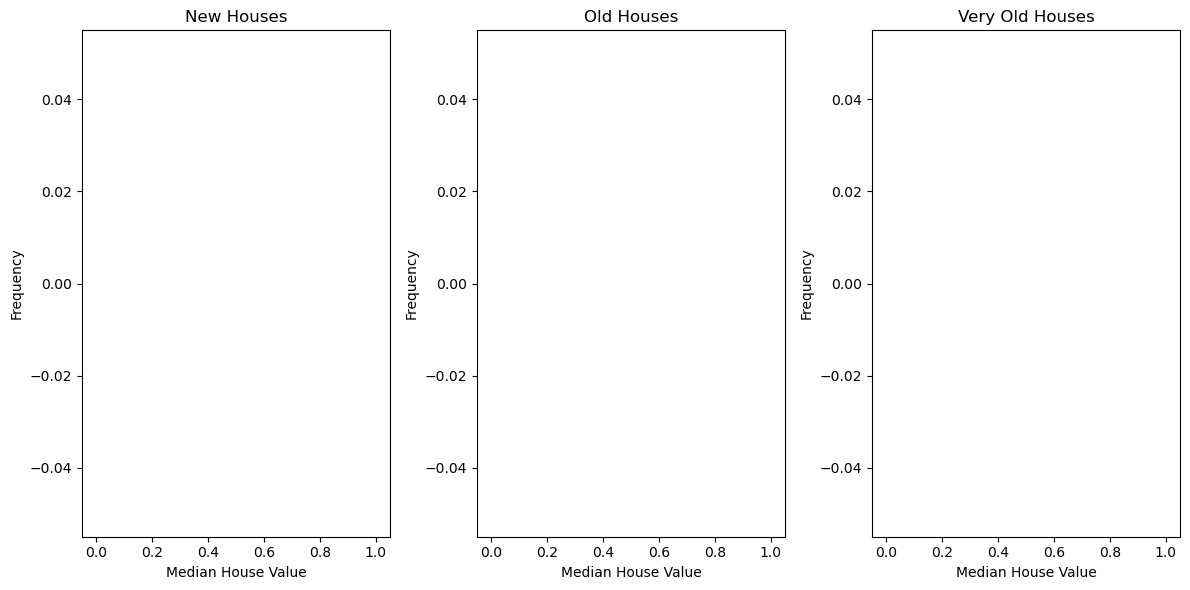

In [15]:
# Boolean Indexing for Age Groups
new_houses = df[df.filter(like='HouseAge_Category_New').eq(1).any(axis=1)]
old_houses = df[df.filter(like='HouseAge_Category_Old').eq(1).any(axis=1)]
very_old_houses = df[df.filter(like='HouseAge_Category_Very Old').eq(1).any(axis=1)]

# Plotting Histograms
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.hist(new_houses['Target'], bins=20, color='blue', alpha=0.7)
plt.title('New Houses')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')

plt.subplot(132)
plt.hist(old_houses['Target'], bins=20, color='green', alpha=0.7)
plt.title('Old Houses')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')

plt.subplot(133)
plt.hist(very_old_houses['Target'], bins=20, color='orange', alpha=0.7)
plt.title('Very Old Houses')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

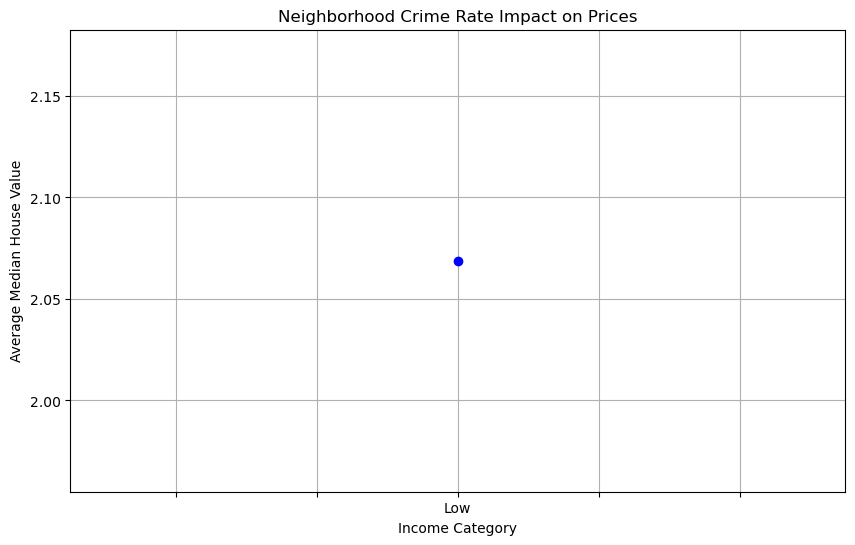

In [12]:
# Creating Binned Income
df['Income_Category'] = pd.cut(df['MedInc'], bins=[0, 3, 6, 9, float('inf')], labels=['Low', 'Moderate', 'High', 'Very High'])

# Grouping by Binned Income
income_groups = df.groupby('Income_Category')['Target'].mean()

# Plotting Line Plot
plt.figure(figsize=(10, 6))
income_groups.plot(marker='o', linestyle='-', color='b')
plt.title('Neighborhood Crime Rate Impact on Prices')
plt.xlabel('Income Category')
plt.ylabel('Average Median House Value')
plt.grid(True)
plt.show()